 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [3]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path
import alpaca_trade_api as tradeapi
from dotenv import load_dotenv
load_dotenv('newkeys.env')
import os

%matplotlib inline

In [42]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [7]:
# Reading whale returns
whaledf = pd.read_csv('whale_returns.csv', index_col="Date", parse_dates=True, infer_datetime_format=True)
whaledf.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [8]:
# Count nulls
whaledf.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [9]:
# Drop nulls
whaledf = whaledf.dropna()

In [10]:
#Check to see if null were dropped
whaledf.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [11]:
# Reading algorithmic returns
algodf = pd.read_csv('algo_returns.csv', index_col="Date", parse_dates=True, infer_datetime_format=True)

In [12]:
#check if 'algodf' works
algodf.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [13]:
# Count nulls
algodf.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [14]:
# Drop nulls
algodf= algodf.dropna()

In [15]:
# check to see if nulls dropped
algodf.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [16]:
# Reading S&P 500 Closing Prices
spdf = pd.read_csv('sp500_history.csv', index_col="Date", parse_dates=True, infer_datetime_format=True)

In [17]:
spdf.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [18]:
# Check Data Types
spdf['Close'].dtype

dtype('O')

In [19]:
# clean "Close" by replacing "$"
spdf['Close'] = spdf['Close'].str.replace('$', '')
spdf['Close'].head()

Date
2019-04-23    2933.68
2019-04-22    2907.97
2019-04-18    2905.03
2019-04-17    2900.45
2019-04-16    2907.06
Name: Close, dtype: object

In [20]:
#Check Data type again
spdf['Close'].dtype

dtype('O')

In [21]:
# Fix Data Types
spdf['Close'] = spdf['Close'].astype('float')
spdf['Close'].dtype

dtype('float64')

In [22]:
# Calculate Daily Returns
daily_return=spdf.pct_change()
daily_return.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [23]:
# Drop nulls
daily_return=daily_return.dropna()

In [24]:
#checking if null dropped
daily_return.head()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [25]:
# Rename `Close` Column to be specific to this portfolio.
daily_return = daily_return.rename(columns={ #this changed
    "Close": "SP500"
})
daily_return.head()

,SP500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [26]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
newdf = pd.concat([whaledf, algodf,daily_return], axis="columns", join="inner") #join inner only connects df by the "same colum" and drops the others
newdf

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577


In [27]:
newdf.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
SP500                          0
dtype: int64

---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

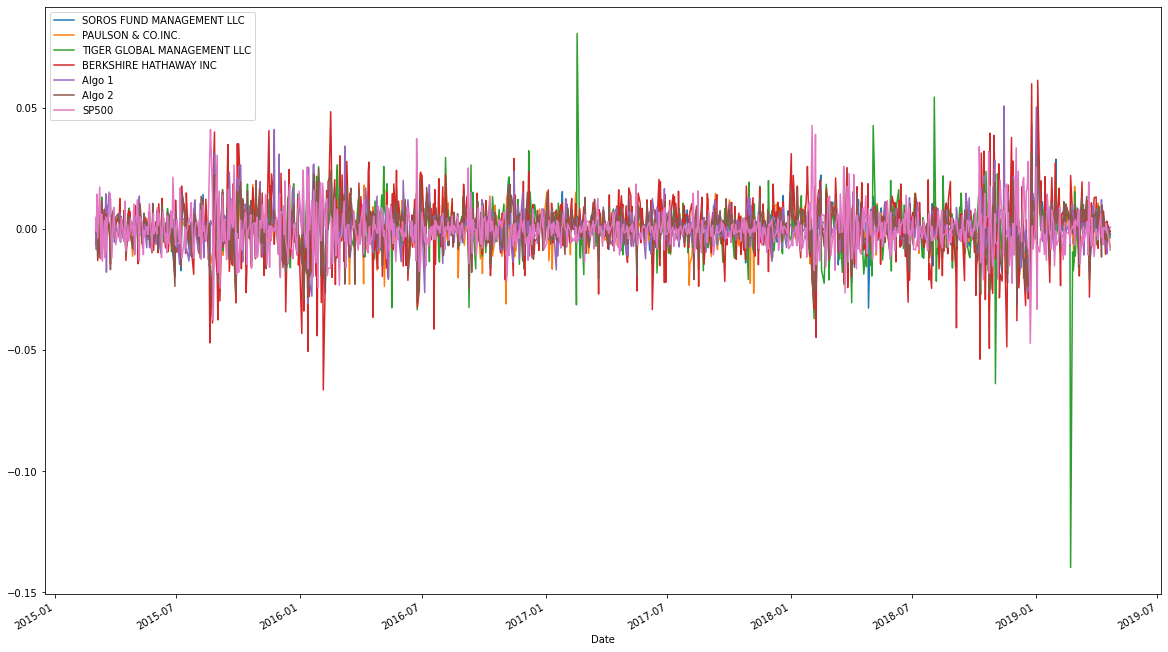

In [28]:
# Plot daily returns of all portfolios
newdf.plot(figsize=(20,12))

In [29]:
newdf.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

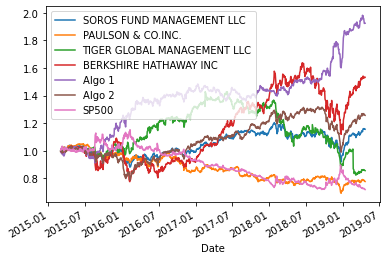

In [30]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + newdf).cumprod()

# Plot cumulative returns
cumulative_returns.plot()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

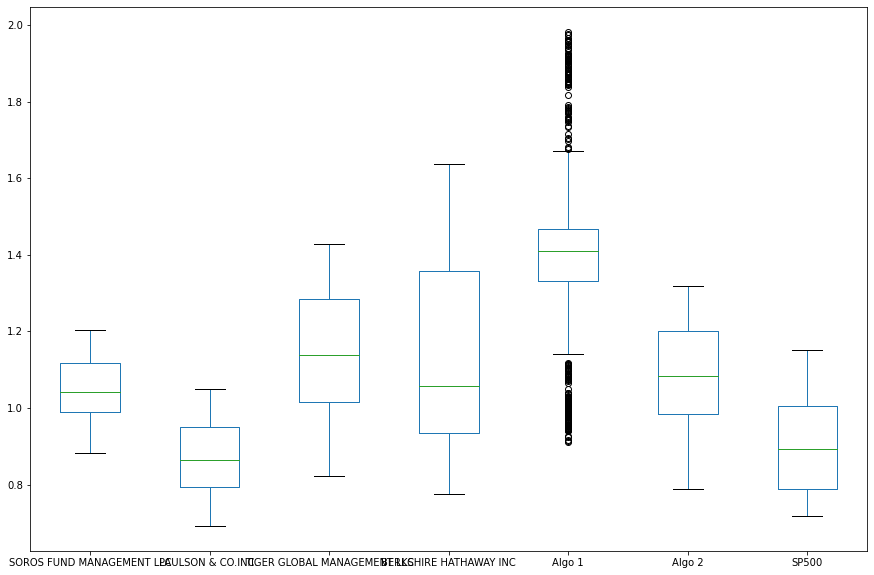

In [31]:
# Box plot to visually show risk
cumulative_returns.plot(kind='box', figsize=(15,10))


### Calculate Standard Deviations

In [32]:
# Calculate the daily standard deviations of all portfolios
std = newdf.std()
std

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
SP500                          0.008587
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [33]:
# Calculate  the daily standard deviation of S&P 500
sp500_std = daily_return['SP500'].std()
sp500_std
# Determine which portfolios are riskier than the S&P 500
print('The Tiger Global Management LLC, Berkshire Hathaway Inc both have higher standard deviations, and therefore are riskier')

The Tiger Global Management LLC, Berkshire Hathaway Inc both have higher standard deviations, and therefore are riskier


### Calculate the Annualized Standard Deviation

In [34]:
# Calculate the annualized standard deviation (252 trading days)
annual_std= sp500_std * 252
print(f'the annualized standard deviation is {annual_std}')

the annualized standard deviation is 2.049929939688


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

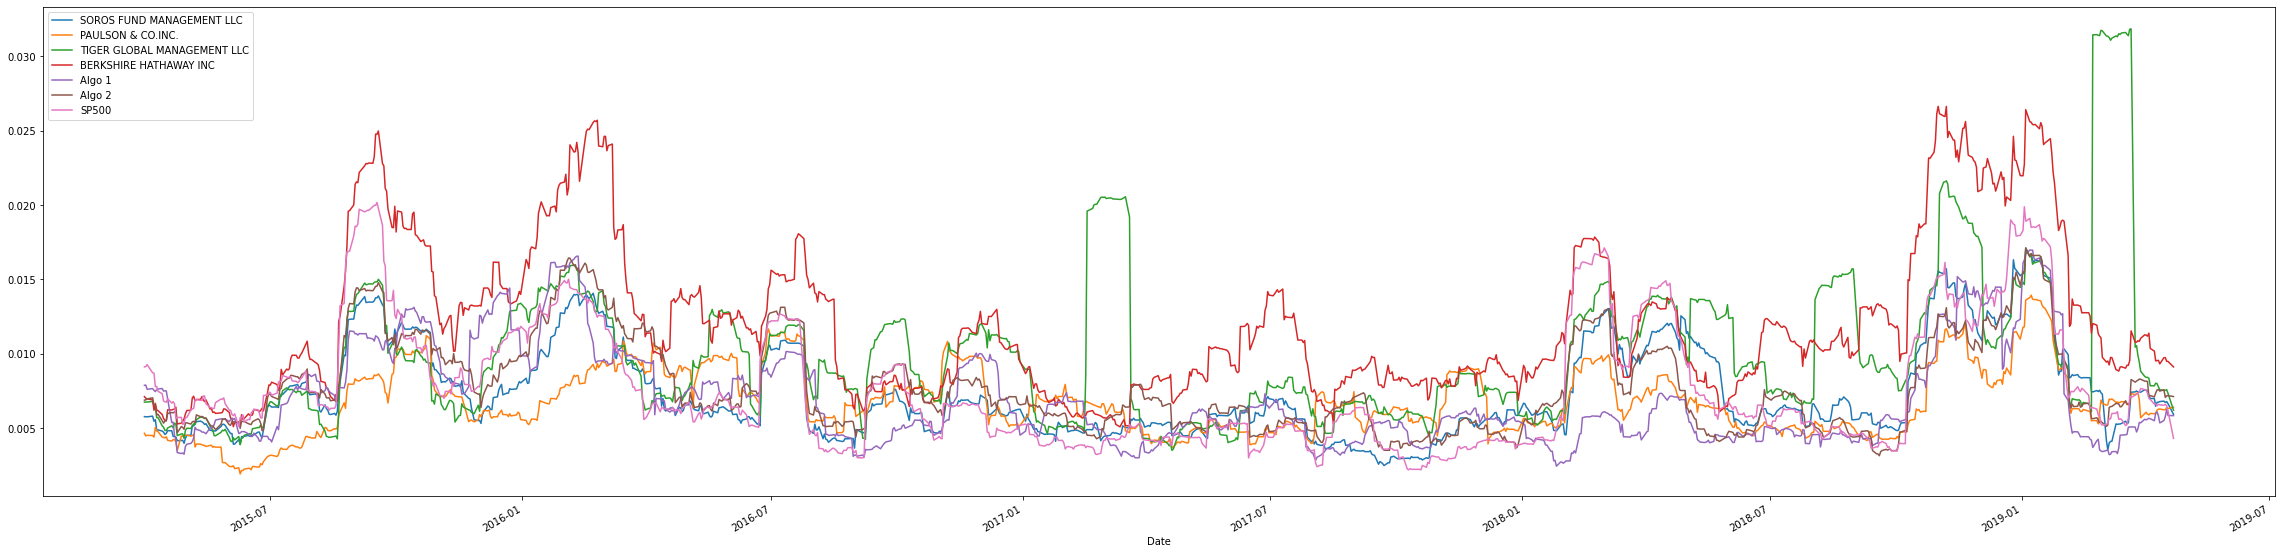

In [35]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_standard_deviation= newdf.rolling(window=21).std()
# Plot the rolling standard deviation
rolling_standard_deviation.plot(figsize=(40,10))

### Calculate and plot the correlation

<AxesSubplot:>

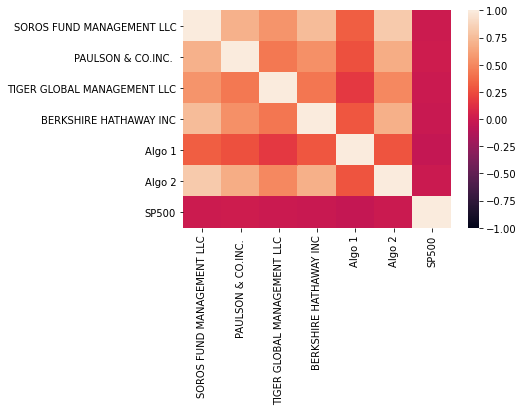

In [36]:
# Calculate the correlation
correlation = newdf.corr()
correlation
# Display de correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1)


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [37]:
# Calculate covariance of a single portfolio
covariance = newdf['SP500'].cov(newdf['Algo 2'])
print(f'the covariance of Algo 1 and Algo 2 is {covariance}')
# Calculate variance of S&P 500
var_sp500 = newdf['SP500'].var()
print(f'The variance of the S&P500 is {var_sp500}')
# Computing beta
beta_sp500 = covariance/var_sp500
print(f'The beta for the S&P500 is {beta_sp500}')
# Plot beta trend
beta_sp500.plot()

the covariance of Algo 1 and Algo 2 is -1.569986536300974e-07
The variance of the S&P500 is 7.373467552840441e-05
The beta for the S&P500 is -0.002129237736587281


AttributeError: 'numpy.float64' object has no attribute 'plot'

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [38]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [39]:
# Annualized Sharpe Ratios
sharpe_ratios = (newdf.mean() * 252) / (newdf.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
SP500                         -0.518582
dtype: float64

<AxesSubplot:>

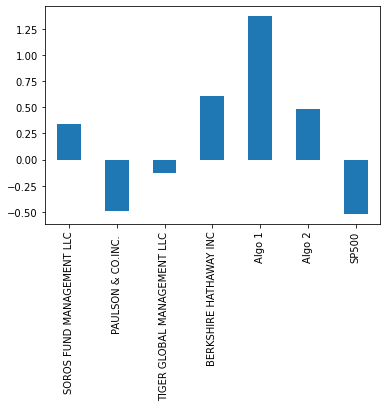

In [40]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [45]:
timeframe = "1D" #setting day frame

start_date = pd.Timestamp("2020-03-26", tz="America/New_York").isoformat() #this set the timeframe
end_date = pd.Timestamp("2021-03-26", tz="America/New_York").isoformat()
tickers = ["TSLA", "COF", "RIOT", "GUSH"] #picked a portfolio of stocks and combines them

df_ticker = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

df_ticker.head()

COF                                     GUSH  \
                            open   high      low  close     volume   open   
time                                                                        
2020-03-26 00:00:00-04:00  55.57  61.40  54.4600  57.79  5347659.0  18.60   
2020-03-27 00:00:00-04:00  54.62  57.08  52.6900  55.30  4013551.0  17.19   
2020-03-30 00:00:00-04:00  54.59  54.99  52.3168  53.81  3284771.0  13.70   
2020-03-31 00:00:00-04:00  52.97  53.77  50.0000  50.42  4318892.0  16.08   
2020-04-01 00:00:00-04:00  46.43  46.63  44.0000  44.68  6694220.0  14.65   

                                                               RIOT          \
                              high    low    close   volume    open    high   
time                                                                          
2020-03-26 00:00:00-04:00  22.5351  17.59  19.0200  2290335  0.8200  0.9300   
2020-03-27 00:00:00-04:00  17.4099  15.00  15.0197  2216602  0.8000  0.8300   
2020-03-30 00:00:00-04:00  15.0400  12.28  14.6779  3383998  0.8070  0.8504   
2020-03-31 00:00:00-04:00  16.7700  15.00  15.7100  3372385  0.8295  0.8600   
2020-04-01 00:00:00-04:00  15.2400  13.48  13.9200  2558502  0.8300  0.8459   

                                                        TSLA            \
                            low     close     volume    open      high   
time                                                                     
2020-03-26 00:00:00-04:00  0.76  0.835700  2455630.0  547.39  560.0000   
2020-03-27 00:00:00-04:00  0.78  0.788700   353423.0  505.00  525.8000   
2020-03-30 00:00:00-04:00  0.78  0.795049   508134.0  510.26  516.6471   
2020-03-31 00:00:00-04:00  0.79  0.830000   708460.0  501.25  542.9600   
2020-04-01 00:00:00-04:00  0.76  0.778200   529374.0  504.00  513.9548   

                                                     
                              low   close    volume  
time                                                 
2020-03-26 00:00:00-04:00  512.25  528.05  16688863  
2020-03-27 00:00:00-04:00  494.03  514.56  13608376  
2020-03-30 00:00:00-04:00  491.23  502.10  11162231  
2020-03-31 00:00:00-04:00  497.00  524.48  16421035  
2020-04-01 00:00:00-04:00  475.10  481.58  12570750

In [36]:
# Reading data from 1st stock


In [37]:
# Reading data from 2nd stock


In [38]:
# Reading data from 3rd stock


In [39]:
# Combine all stocks in a single DataFrame


In [40]:
# Reset Date index


In [57]:
# Reorganize portfolio data by having a column per symbol
df_closing_prince = pd.DataFrame() #creates an empty datadrame for closing prices
for ticker in tickers:
    df_closing_prince[ticker]= df_ticker[ticker]['close'] #puts all close price in dataframe
df_closing_prince.index = df_closing_prince.index.date

df_closing_prince.head()

,TSLA,COF,RIOT,GUSH
2020-03-26,528.05,57.79,0.835700,19.0200
2020-03-27,514.56,55.30,0.788700,15.0197
2020-03-30,502.10,53.81,0.795049,14.6779
2020-03-31,524.48,50.42,0.830000,15.7100
2020-04-01,481.58,44.68,0.778200,13.9200


In [58]:
df_closing_prince.columns

Index(['TSLA', 'COF', 'RIOT', 'GUSH'], dtype='object')

In [62]:
# Calculate daily returns
portfolio_daily_return= df_closing_prince.pct_change()

# Drop NAs
portfolio_daily_return= portfolio_daily_return.dropna()
# Display sample data
portfolio_daily_return

,TSLA,COF,RIOT,GUSH
2020-03-27,-0.025547,-0.043087,-0.056240,-0.210321
2020-03-30,-0.024215,-0.026944,0.008050,-0.022757
2020-03-31,0.044573,-0.062999,0.043961,0.070317
2020-04-01,-0.081795,-0.113844,-0.062410,-0.113940
2020-04-02,-0.056294,-0.016786,0.002313,0.170618
...,...,...,...,...
2021-03-22,0.022948,-0.008866,-0.077988,-0.030161
2021-03-23,-0.011231,-0.022123,-0.103720,-0.096130
2021-03-24,-0.048840,0.012169,-0.087069,0.031424
2021-03-25,0.016457,0.031389,0.053193,0.032913


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [71]:
# Set weights
weights = [1/4, 1/4, 1/4, 1/4]

# Calculate portfolio return
weighted_portfolio_returns=portfolio_daily_return.dot(weights)

# Display sample data
weighted_portfolio_returns.head()


2020-03-27   -0.083799
2020-03-30   -0.016466
2020-03-31    0.023963
2020-04-01   -0.092997
2020-04-02    0.024963
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame
columns = ['TSLA', 'COF', 'RIOT', 'GUSH', 'Return'] #tried creating a new column and try to append the "return" in the new column, but get error
portfolio_daily_return.columns = columns


In [45]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [73]:
# Calculate the annualized `std`
my_portfolio_std = weighted_portfolio_returns.std()
my_portfolio_std

0.047850335286997496

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:>

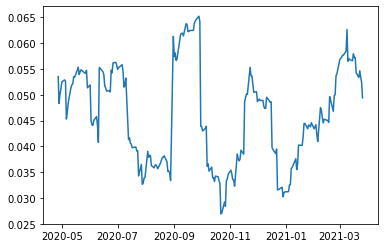

In [80]:
# Calculate rolling standard deviation
portfolio_rolling_std=weighted_portfolio_returns.rolling(window=21).std()
# Plot rolling standard deviation
portfolio_rolling_std.plot()

### Calculate and plot the correlation

In [83]:
# Calculate and plot the correlation
correlation=portfolio_daily_return.corr()
correlation

,TSLA,COF,RIOT,GUSH
TSLA,1.000000,0.153553,0.258022,0.174593
COF,0.153553,1.000000,0.167582,0.636244
RIOT,0.258022,0.167582,1.000000,0.190926
GUSH,0.174593,0.636244,0.190926,1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [101]:
#calculating covariance
covariance = portfolio_returns.cov(portfolio_daily_return['TSLA'])
covariance

0.001959680617313691

In [99]:
portfolio_daily_return.columns

Index(['TSLA', 'COF', 'RIOT', 'GUSH'], dtype='object')

In [96]:
#calculating variance
variance=portfolio_returns.var()
variance

0.0022896545870780775

In [106]:
# Calculate and plot Beta
BETA =covariance/variance
BETA #unable to plot beta

0.8558848257607801

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [109]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratios_weighted = (portfolio_daily_return.mean() * 252) / (portfolio_daily_return.std() * np.sqrt(252))
sharpe_ratios_weighted

TSLA    1.068715
COF     1.704077
RIOT    3.232493
GUSH    1.720775
dtype: float64

<AxesSubplot:>

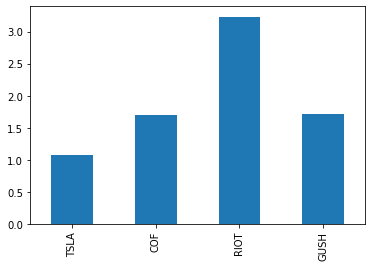

In [110]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_weighted.plot(kind='bar')

### How does your portfolio do?

Write your answer here!

In [111]:
print ('My portfolio is volatile')

My portfolio is volatile
